In [0]:
!cp /content/drive/My\ Drive/Project\ Shit/new\ data.zip /content/

In [0]:
!unzip new\ data.zip -d ./data

Archive:  new data.zip
   creating: ./data/new data/
   creating: ./data/new data/SkateBoarding/
  inflating: ./data/new data/SkateBoarding/708-75070.avi  
  inflating: ./data/new data/SkateBoarding/711-66044.avi  
  inflating: ./data/new data/SkateBoarding/708-77009.avi  
  inflating: ./data/new data/SkateBoarding/1058-22003.avi  
  inflating: ./data/new data/SkateBoarding/761-39000.avi  
  inflating: ./data/new data/SkateBoarding/947-58108.avi  
  inflating: ./data/new data/SkateBoarding/860-37150.avi  
  inflating: ./data/new data/SkateBoarding/947-70005.avi  
  inflating: ./data/new data/SkateBoarding/860-2729.avi  
   creating: ./data/new data/Running/
  inflating: ./data/new data/Running/2670-5_70111.avi  
  inflating: ./data/new data/Running/5238-17_701141.avi  
  inflating: ./data/new data/Running/5238-17_700000.avi  
  inflating: ./data/new data/Running/3687-17_70245.avi  
  inflating: ./data/new data/Running/5117-8_70157.avi  
  inflating: ./data/new data/Running/7850-5_70090

In [0]:
!

In [0]:
!python3 extract.py

[INFO] Directories Created
[INFO] ./data/video_data/Riding Horse/6029-1_70001.avi(57) is completed
[INFO] ./data/video_data/Riding Horse/1098-6_70000.avi(58) is completed
[INFO] ./data/video_data/Riding Horse/4456-16_700516.avi(60) is completed
[INFO] ./data/video_data/Riding Horse/RF1-12001_70063.avi(60) is completed
[INFO] ./data/video_data/Riding Horse/4456-16_700165.avi(60) is completed
[INFO] ./data/video_data/Riding Horse/6029-1_70143.avi(60) is completed
[INFO] ./data/video_data/Riding Horse/6018-29_70000.avi(39) is completed
[INFO] ./data/video_data/Riding Horse/6326-9_70170.avi(60) is completed
[INFO] ./data/video_data/Riding Horse/4456-16_700406.avi(60) is completed
[INFO] Riding Horse completed
[INFO] ./data/video_data/SkateBoarding/947-58108.avi(70) is completed
[INFO] ./data/video_data/SkateBoarding/761-39000.avi(70) is completed
[INFO] ./data/video_data/SkateBoarding/947-70005.avi(70) is completed
[INFO] ./data/video_data/SkateBoarding/860-37150.avi(70) is completed
[INFO

In [0]:
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32
IMG_DIR = "data/image_data"

In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip = True,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(
    rescale=1/255,
)

In [0]:
!rmdir data/image_data/.ipynb_checkpoints

rmdir: failed to remove 'data/image_data/.ipynb_checkpoints': No such file or directory


In [0]:
train_generator = train_datagen.flow_from_directory(
    IMG_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
)
validation_generator = train_datagen.flow_from_directory(
    IMG_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 292 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [0]:
print("Total output neurons:",len(train_generator.class_indices))
train_generator.class_indices

Total output neurons: 4


{'Golf Swinging': 0, 'Riding Horse': 1, 'Running': 2, 'SkateBoarding': 3}

In [0]:
prior = keras.applications.VGG16(
    include_top=False, 
    weights='imagenet',
    input_shape=IMAGE_SIZE + [3]
)
model = Sequential()
model.add(prior)
model.add(MaxPooling2D(pool_size=(7, 7)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(len(train_generator.class_indices), activation='softmax', name='Output_Layer'))

model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output_Layer (Dense)         (None, 4)                 2052      
Total params: 14,979,396
Trainable params: 264,708
Non-trainable params: 14,714,688
____________________________________

In [0]:
filepath="weights-best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator.filenames) // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(train_generator.filenames) // BATCH_SIZE,
    callbacks=[checkpoint],
    use_multiprocessing = True,workers=16
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
9/9 [==============================] - 258s 29s/step - loss: 1.7430 - acc: 0.3324 - val_loss: 1.4126 - val_acc: 0.2958
Epoch 2/20


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


9/9 [==============================] - 269s 30s/step - loss: 1.0406 - acc: 0.5729 - val_loss: 0.9313 - val_acc: 0.5775
Epoch 3/20
9/9 [==============================] - 240s 27s/step - loss: 0.7093 - acc: 0.7536 - val_loss: 0.7091 - val_acc: 0.7418
Epoch 4/20
9/9 [==============================] - 257s 29s/step - loss: 0.5347 - acc: 0.8307 - val_loss: 0.8821 - val_acc: 0.6150
Epoch 5/20
9/9 [==============================] - 257s 29s/step - loss: 0.5032 - acc: 0.8315 - val_loss: 0.6234 - val_acc: 0.7183
Epoch 6/20
9/9 [==============================] - 271s 30s/step - loss: 0.3936 - acc: 0.8785 - val_loss: 0.5793 - val_acc: 0.7559
Epoch 7/20
9/9 [==============================] - 243s 27s/step - loss: 0.3092 - acc: 0.9218 - val_loss: 0.6161 - val_acc: 0.7746
Epoch 8/20
9/9 [==============================] - 271s 30s/step - loss: 0.2927 - acc: 0.9097 - val_loss: 0.4265 - val_acc: 0.8216
Epoch 9/20
9/9 [==============================] - 243s 27s/step - loss: 0.3475 - acc: 0.8709 - val_lo

In [0]:
model.save("modal.hdf5")

In [0]:
import pickle

In [0]:
f = open("graph_data.pkl",'wb')
pickle.dump(history.history,f)

In [0]:
f = open("label.pkl",'wb')
pickle.dump(train_generator.class_indices,f)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


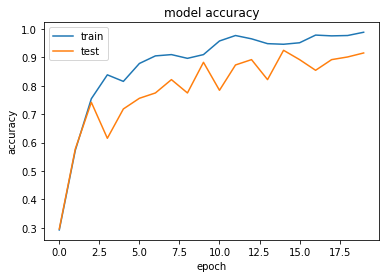

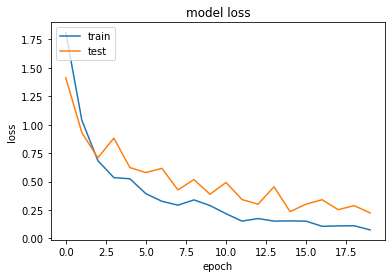

In [0]:
print(history.history.keys())
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
!cp modal.hdf5 ./drive/My\ Drive/Project\ Shit